<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Predict_Diabets_OA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Step 1:
#Use of Pandas + Matplotlib libraries  
#to understand our Dataset (Reading data of our Dataset)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files 

In [6]:
uploaded = files.upload()

Saving diabetes75pc_100_times.csv to diabetes75pc_100_times.csv


In [7]:
dataset = pd.read_csv('diabetes75pc_100_times.csv')
dataset.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,0,0,37.82,0.59,68,0
3,7,141,90,41,0,34.25,0.40,39,0
4,4,120,72,0,0,29.12,0.39,46,1


In [8]:
#Our dataset contains 768 rows and 9 columns 
dataset.shape

(77568, 9)

In [9]:
#The columns of our Dataset:
#Describe the columns?
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#No missing value in our dataset
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#Number of elements in our dataset (number of points)
dataset.size

698112

In [13]:
#Statistical description of our dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,77568.000000,77568.000000,77568.000000,77568.000000,77568.000000,77568.000000,77568.000000,77568.000000,77568.000000
mean,3.845516,124.884488,69.105469,20.536458,79.799479,33.181591,0.489430,33.240885,0.348958
std,3.369130,33.202236,19.343326,15.941931,115.169692,8.205376,0.343634,11.752648,0.476644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,28.140000,0.250000,24.000000,0.000000
50%,3.000000,121.000000,72.000000,23.000000,30.500000,33.230000,0.390000,29.000000,0.000000
75%,6.000000,145.000000,80.000000,32.000000,127.250000,37.910000,0.650000,41.000000,1.000000
max,18.000000,213.000000,122.000000,99.000000,846.000000,72.120000,2.600000,81.000000,1.000000


In [14]:
#We have 268 patients who are diabetic and the other 500 not
dataset.Outcome.value_counts()

0    50500
1    27068
Name: Outcome, dtype: int64

In [15]:
#Step 2 : Data visualization

Text(0, 0.5, 'Count')

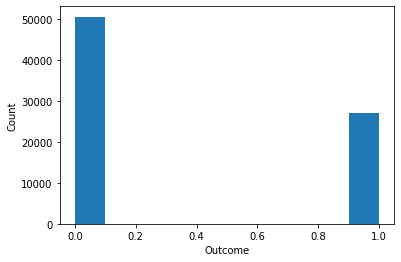

In [16]:
#A histogram showing the number of people with and without diabetes
plt.hist(dataset['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count')

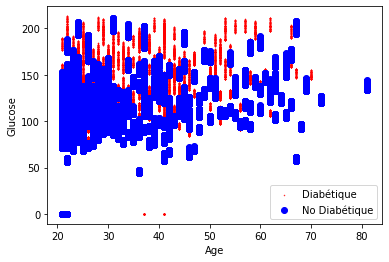

In [17]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r",s=0.2)
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()

In [18]:
dataset['Age'].max()

81

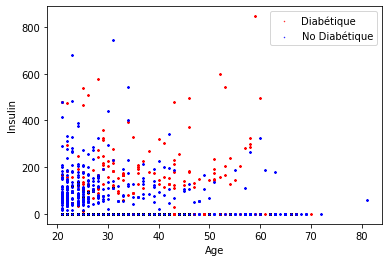

In [19]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Insulin,label="Diabétique",c="r",s=0.2)
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Insulin,label="No Diabétique",c="b",s=0.2)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()

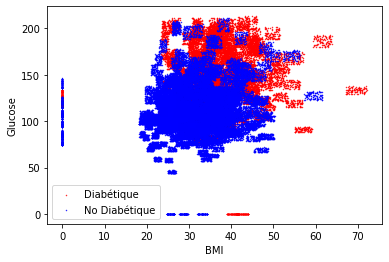

In [20]:
plt.scatter(dataset[dataset.Outcome==1].BMI,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r",s=0.2)
plt.scatter(dataset[dataset.Outcome==0].BMI,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b",s=0.2)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend()

Text(0, 0.5, 'BloodPressure')

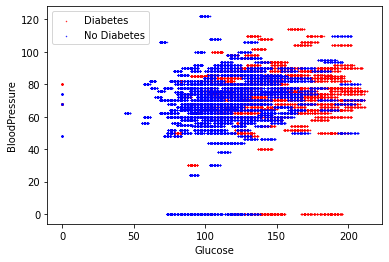

In [21]:
plt.scatter(dataset[dataset.Outcome==1].Glucose,dataset[dataset.Outcome==1].BloodPressure,label='Diabetes',color='r',s=0.2)
plt.scatter(dataset[dataset.Outcome==0].Glucose,dataset[dataset.Outcome==0].BloodPressure,label='No Diabetes',color='b',s=0.2)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

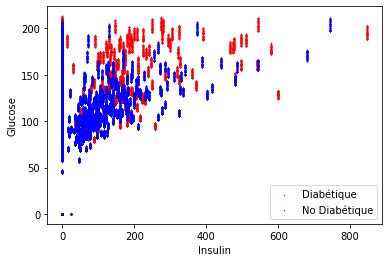

In [22]:
plt.scatter(dataset[dataset.Outcome==1].Insulin,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r",s=0.2)
plt.scatter(dataset[dataset.Outcome==0].Insulin,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b",s=0.2)
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.legend()

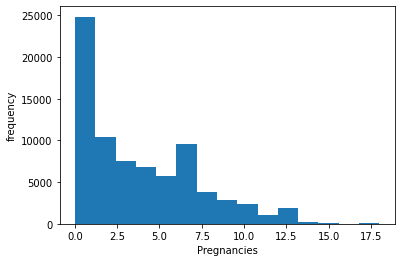

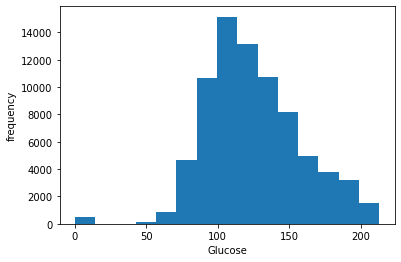

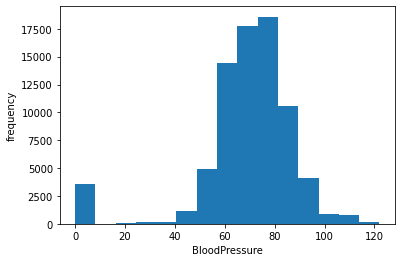

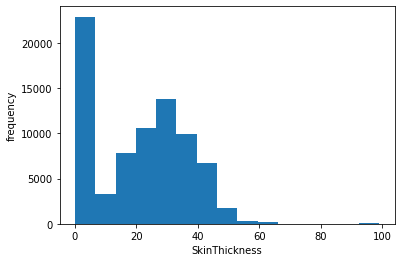

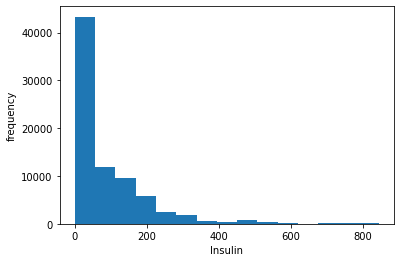

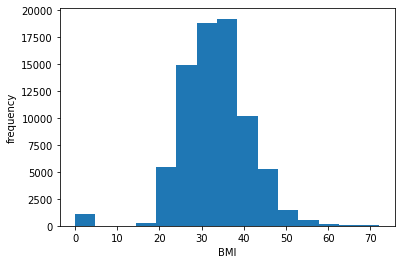

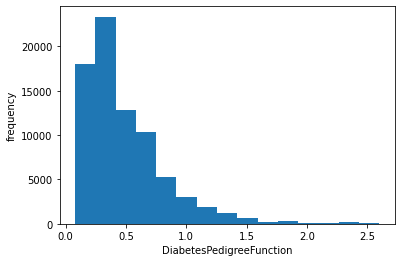

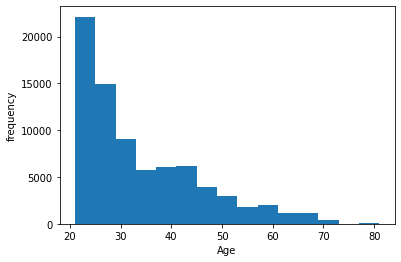

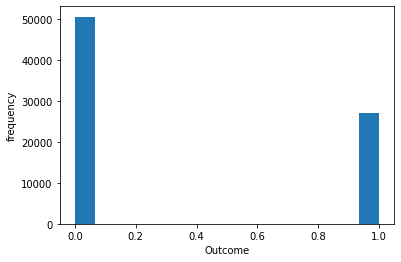

In [23]:
for c in dataset.columns:
    plt.figure()
    plt.hist(dataset[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.show()

In [24]:
#Step 3: Data Preprocessing

In [88]:
#Replacing 0 with NaN
import random
dataset_new = dataset
#liste = ["BloodPressure", "SkinThickness", "Insulin", "BMI"]
#dataset_new[liste] = dataset_new[liste].replace(0, np.NaN)
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,99,846,37.82,0.59,68,0
3,7,141,90,41,846,34.25,0.40,39,0
4,4,120,72,99,846,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91,58,11,54,26.26,0.27,22,0
77564,2,112,62,32,56,26.40,0.13,21,0
77565,4,128,68,99,846,36.47,0.40,29,0
77566,1,101,68,21,846,28.56,1.11,22,0


In [57]:
#nv_dataset=dataset_new['Insulin','BMI']
#nv_dataset
#dataset_new[['Insulin','BMI']]
#liste = ["BloodPressure", "SkinThickness", "Insulin", "BMI"]
#dataset_new['Outcome'][0]==0
#dataset_new[]
#c = pd.Series(liste[0])
#c
#type(dataset_new["Outcome"])
#type(dataset_new[dataset_new.Outcome==0].Glucose)


pandas.core.series.Series

In [76]:
'''liste = ["BloodPressure", "SkinThickness", "Insulin", "BMI"]
c = pd.Series(liste[0])
c'''
#dataset_new[dataset_new.Outcome==0].c

0    BloodPressure
dtype: object

In [93]:
liste = ["BloodPressure", "SkinThickness", "Insulin", "BMI"]
for colonne in liste:
  max = dataset_new[colonne].max()
  min = dataset_new[colonne].min()
#Idéé bien structurée!!!!
  for i,value in dataset_new[colonne].iteritems():
    if(value==0):
      dataset_new[colonne] = dataset_new[colonne].replace(0,random.randint(min,max))
    #elif(value==0 and dataset_new['Outcome'][i]==1):
      #dataset_new[colonne] = dataset_new[colonne].replace(0,random.randint(min_diab,max_diab))  
#dataset_new   

ValueError: ignored

In [ ]:
# Count of NaN
dataset_new.isnull().sum()

In [ ]:
dataset_new.head()

In [ ]:
#Replacing Nan with mean values of colomns 
for i in liste:
    dataset_new[i].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new.head()

In [ ]:
plt.scatter(dataset_new[dataset_new.Outcome==1].Age,dataset_new[dataset_new.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Age,dataset_new[dataset_new.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()

In [ ]:
plt.scatter(dataset_new[dataset_new.Outcome==1].Age,dataset_new[dataset_new.Outcome==1].Insulin,label="Diabétique",c="r")
plt.scatter(dataset_new[dataset_new.Outcome==0].Age,dataset_new[dataset_new.Outcome==0].Insulin,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()

In [ ]:
plt.scatter(dataset_new[dataset_new.Outcome==1].Insulin,dataset_new[dataset_new.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset_new[dataset_new.Outcome==0].Insulin,dataset_new[dataset_new.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.legend()

In [ ]:
dataset_new.groupby("Outcome").agg({"Age":"mean"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Age":"max"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Age":"min"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Glucose":"mean"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Glucose":"max"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Glucose":"min"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Insulin":"mean"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Insulin":"max"})

In [ ]:
dataset_new.groupby("Outcome").agg({"Insulin":"min"})

In [ ]:
dataset_new.groupby("Outcome").agg({"SkinThickness":"mean"})

In [ ]:
dataset_new.groupby("Outcome").agg({"SkinThickness":"max"})

In [ ]:
dataset_new.groupby("Outcome").agg({"SkinThickness":"min"})

In [ ]:
a = ["Glucose","Age"]
for j in a:
  dataset_new.groupby("Outcome").agg({j:"mean"})

In [ ]:
#Décomposition de notre dataset (train + test)
import sklearn
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.35,random_state=0) 


In [ ]:
train.count()

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
#Application de l'algorithme knn



In [108]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_new.iloc[:, [0,1, 3,4, 5, 7]].values
Y = dataset_new.iloc[:, 8].values


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [109]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (62054, 5)
X_test shape: (15514, 5)
Y_train shape: (62054,)
Y_test shape: (15514,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


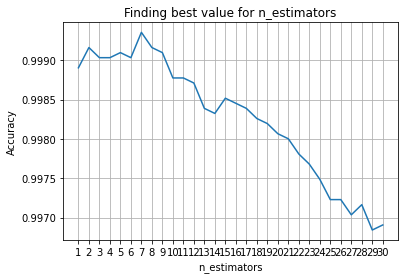

Highest value:  0.9993554209101456


In [112]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())